# Intro to the functional API of Keras

https://keras.io/getting-started/functional-api-guide/

https://www.perfectlyrandom.org/2019/06/24/a-guide-to-keras-functional-api/



In [0]:
%pylab inline
plt.style.use('seaborn-talk')
import pandas as pd

from keras import models
from keras import layers

Populating the interactive namespace from numpy and matplotlib


In [0]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

In [0]:
from sklearn.datasets import load_diabetes

In [0]:
def normalise(data):
    m=np.mean(data)
    s=np.std(data)
    normalised_data=(data-m)/s
    return normalised_data

def get_data():
    diabetes=load_diabetes()
    features=np.array(diabetes.data)
    labels=np.array(diabetes.target)
    labels=np.reshape(labels,(-1,1))
    labels=normalise(labels)
    
    print(features.shape,labels.shape)
    return (features,labels)

In [0]:
X,Y=get_data()

(442, 10) (442, 1)


# SKLearn

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
skmodel=LinearRegression()
skmodel.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
mean_squared_error(y_pred=skmodel.predict(X),y_true=Y)

0.4822505745867066

# By matrix decomposition

In [0]:
X.shape

(442, 10)

We perform the Singular Value Decomposition

In [0]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

In [0]:
U.shape

(442, 10)

In [0]:
sigma.shape

(10,)

In [0]:
VT.shape

(10, 10)

In [0]:
D_plus = np.diag(1/sigma[:10])
#D_plus = np.diag(np.hstack([1/sigma[:10], np.zeros(0)]))

In [0]:
V = VT.T

In [0]:
X_plus = V.dot(D_plus).dot(U.T)

In [0]:
w = X_plus.dot(Y)

In [0]:
X.shape

(442, 10)

In [0]:
mean_squared_error(y_pred=X.dot(w),y_true=Y)

NameError: ignored

#Keras 

Keras basically have three core objects:


*   Tensors : The object that contains the information to be treated. It is a version of Tensorflow Tensors

*   Layers : Ojects that perform transformations over Tensors 

*   Models: An object containing the neural network information, optimizer, loss function, etc..

The combination of them using a very easy and human readable approach is what makes Keras so powerful



![basic transformation](https://www.perfectlyrandom.org/assets/a-guide-to-keras-functional-api/layer-transformation.svg)


# Model : Sequential

In [0]:
model=models.Sequential( )
model.add(layers.Dense(1, input_shape=(10,), activation=None))


In [0]:
model.compile(optimizer='SGD',loss='mse',metrics=['mse','mae'])

In [0]:
hst=model.fit(X,Y, batch_size=10, epochs=200,shuffle=True,validation_split=0.1,verbose=0)


In [0]:
plotdf=pd.DataFrame(hst.history)


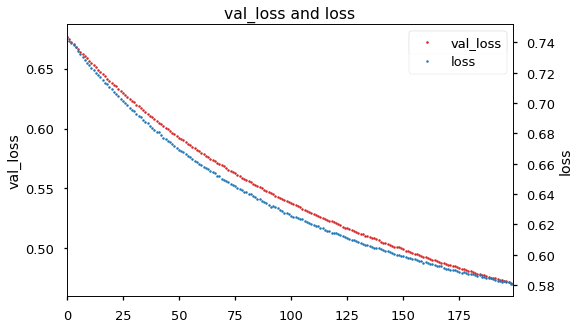

In [0]:
fix,ax1=plt.subplots(figsize=(8,5))
ax2=ax1.twinx()

plotdf.plot(y='val_loss',ax=ax1,
            c='tab:red',marker='.',markersize=5,linestyle='')

plotdf.plot(y='loss',ax=ax2,
            c='tab:blue',marker='.',markersize=5,linestyle='')

ax1.set_ylabel('val_loss')
ax2.set_ylabel('loss')


ax1.set_title('val_loss and loss')

ax2.set_ylabel('loss')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


pass

In [0]:
eval_result=model.evaluate(x=X,y=Y)
pd.DataFrame(np.array(eval_result).reshape(1,3),columns=model.metrics_names)

442/442 [==============================] - 0s 43us/step


,loss,mean_squared_error,mean_absolute_error
0,0.568524,0.568524,0.62953


# Model with the Functional API

The functional API is way more flexible and allow to produce models that concatenate other networks or more complex schemas

In [0]:
inputs = layers.Input(shape=(10,))

In [0]:
dense1=layers.Dense(15,activation='linear')(inputs)
norm1=layers.BatchNormalization()(dense1)
dense2=layers.Dense(5,activation='linear')(norm1)
predictions = layers.Dense(1, activation='linear')(dense2)

In [0]:
model_api = models.Model(inputs=inputs, outputs=predictions)


In [0]:
model_api = models.Model(inputs=inputs, outputs=predictions)
model_api.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse'])
result=model_api.fit(X,Y,batch_size=8, epochs=10,shuffle=True,validation_split=0.1,verbose=0 ) # starts training
pass

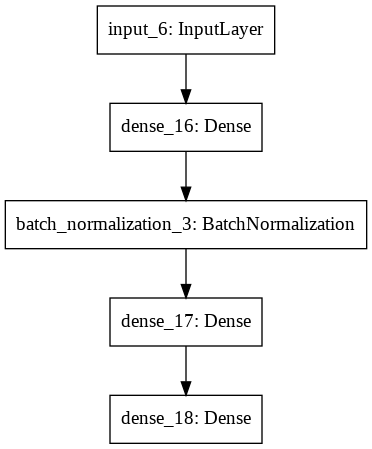

In [0]:
from keras.utils import plot_model
plot_model(model_api)

In [0]:
plotdf=pd.DataFrame(result.history)


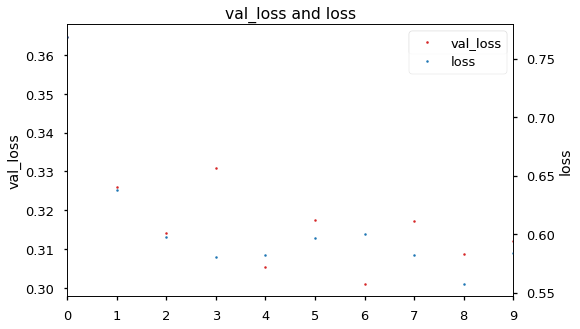

In [0]:
fix,ax1=plt.subplots(figsize=(8,5))
ax2=ax1.twinx()

plotdf.plot(y='val_loss',ax=ax1,
            c='tab:red',marker='.',markersize=5,linestyle='')

plotdf.plot(y='loss',ax=ax2,
            c='tab:blue',marker='.',markersize=5,linestyle='')

ax1.set_ylabel('val_loss')
ax2.set_ylabel('loss')


ax1.set_title('val_loss and loss')

ax2.set_ylabel('loss')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


pass

In [0]:
model_api.evaluate(x=X,y=Y)

442/442 [==============================] - 0s 58us/step


[0.4915822087639597, 0.4915822087639597]